# Mathematical analysis of the van der Waals isotherms


**Code:** #118-000

**File:** `apps/van_der_waals/mathematical_analysis.ipynb`

**Run it online:** [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/jongablop/MinervaLab/master?urlpath=%2Fnotebooks%2Fapps%2Fvan_der_waals%2Fmathematical_analysis.ipynb)

-----------

The aim of this notebook is to show the mathematical function of van der Waals isotherms.

## Interface

The main interface (``main_block_118_000``) is divided in two HBox: ``top_block_118_000`` and ``bottom_block_118_000``. ``top_block_118_000`` contains of a bqplot Figure (``fig_118_001``) and ``bottom_block_118_000`` contains 4 bqplot Figures: ``fig_118_003``, ``fig_118_004``, ``fig_118_005`` and ``fig_118_006``.
The slider ``zoom_slider`` controls the zoom of ``fig_118_001``.

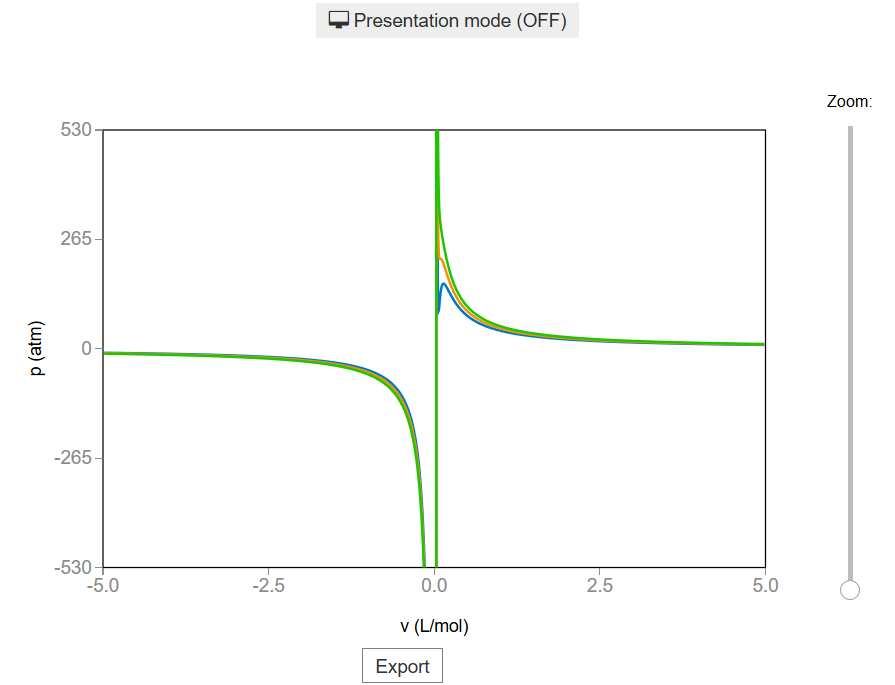

In [1]:
from IPython.display import Image
Image(filename='../../static/images/118-000_1.png')

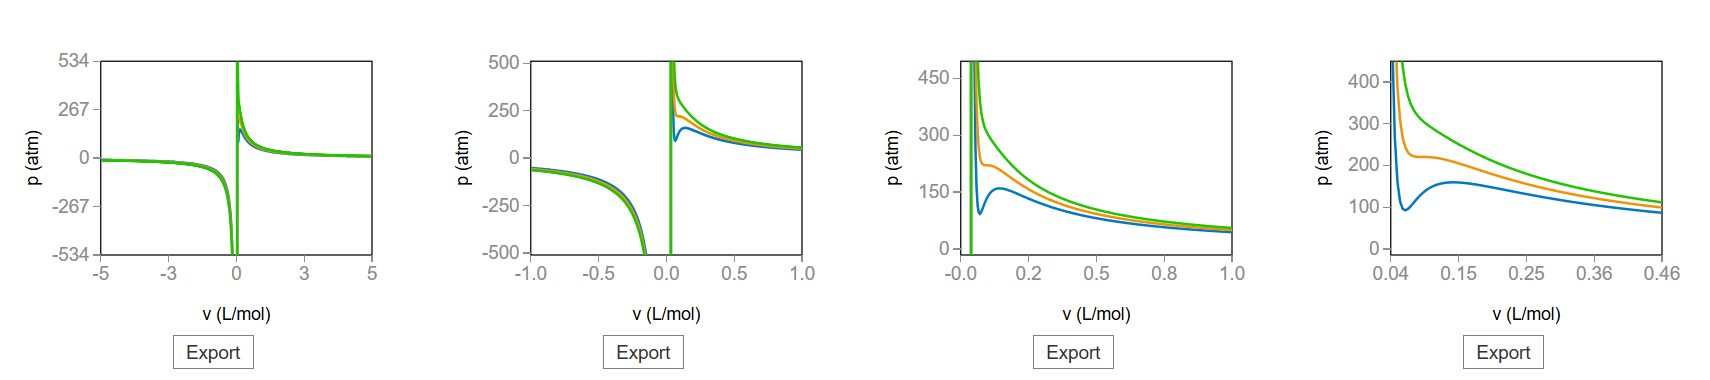

In [2]:
Image(filename='../../static/images/118-000_2.png')

## CSS
A custom `css` file is used to improve the interface of this application. It can be found [here](https://github.com/jongablop/MinervaLab/blob/master/static/custom.css).

In [1]:
from IPython.display import HTML
display(HTML("<head><link rel='stylesheet' type='text/css' href='./../../static/custom.css'></head>"))
display(HTML("<style>.container { width:100% !important; }</style>"))

## Packages

In [2]:
from bqplot import *
import bqplot as bq
import bqplot.marks as bqm
import bqplot.scales as bqs
import bqplot.axes as bqa

import ipywidgets as widgets

import urllib.parse
import webbrowser

import sys

## Physical functions

This are the functions that have a physical meaning:

- `calculate_critic`
- `get_absolute_isotherms`
- `bar_to_atm`

In [3]:
def calculate_critic(a, b):
    
    """
        This function calculates the critic point 
        (p_c, v_c, T_c) from given a and b parameters of 
        the Van der Waals equation of state for real gases.
        
        :math:`(P + a \\frac{n^2}{V^2})(V - nb) = nRT`
        
        :math:`p_c = \\frac{a}{27 b^2}`
        :math:`v_c = 3b`
        :math:`T_c = \\frac{8a}{27 b R}`
        
   Args:
       a: Term related with the attraction between particles in
       L^2 bar/mol^2.\n
       b: Term related with the volume that is occupied by one 
       mole of the molecules in L/mol.\n
       
   Returns:
       p_c: Critical pressure in bar.\n
       v_c: Critical volume in L/mol.\n
       T_c: Critical tenperature in K.\n
        
    """
    
    if b == 0.0:
        return None
    
    k_B = 1.3806488e-23 #m^2 kg s^-2 K^-1
    N_A = 6.02214129e23 
    R = 0.082 * 1.01325 #bar L mol^-1 K^-1
    
    p_c = a/27.0/(b**2)
    v_c = 3.0*b
    T_c = 8.0*a/27.0/b/R
    
    return p_c, v_c, T_c

In [4]:
def get_absolute_isotherms(a, b, v_values, T_values):
    """This function calculates the theoretical p(v, T) plane 
        (in absolute coordinates) according to van der Waals
        equation of state from a given range of volumes
        and tenperatures.

    Args:
        a: Term related with the attraction between particles in
           L^2 bar/mol^2.\n
        b: Term related with the volume that is occupied by one 
        mole of the molecules in L/mol.\n
        v_values: An array containing the values of v
        for which the isotherms must be calculated.\n
        T_values: An array containing the values of T for which
        the isotherms must be calculated.\n

        
    Returns:
        isotherms: A list consisted of numpy arrays containing the
        pressures of each isotherm.
    """
    isotherms = []

    R = 0.082 * 1.01325 #bar L mol^-1 K^-1

    for T in T_values:
        
        isot = []
        
        for v in v_values:
            
            p = R*T/(v - b) - (a/v**2)
            isot = np.append(isot, p)
            
        isotherms.append(isot)
        
    return isotherms

In [5]:
def bar_to_atm(p_values):
    """This function changes the pressures of an array
    form bars to atm.
    
    Args:
        p_values: List consisted of pressures in bars.\n
        
    Returns:
        p_values: List consisted of pressures in atm.\n
    """
    
    p_values = np.array(p_values) * 0.9869 
        
    return p_values

## Functions related to the interaction

In [6]:
def update_scales(change):
    """This function updates the scales of fig_118_001 (and its marks)
    when the value of zoom_slider is changed.\n
    """
    index = change.owner.value
    
    new_scale_x = bqs.LinearScale(min = x_min[index], max = x_max[index])
    new_scale_y = bqs.LinearScale(min = y_min[index], max = y_max[index])
    
    
    # if the scales are not updated in this order the transition
    # is a bit laggy
    
    for mark in fig_118_001.marks:
        
        mark.scales = {
            'x' : new_scale_x,
            'y' : new_scale_y
        }
    
    axis_x_118_001.scale = new_scale_x
    axis_y_118_001.scale = new_scale_y

In [7]:
def change_view(change):
    """This function changes the visualization of all the
    components of the application so they are suitable for
    a projection.\n
    """
    
    obj = change.owner

    if obj.value:
        
        obj.description = 'Presentation mode (ON)'
        
        display(HTML(
            "<style>" \
            ".widget-readout { font-size: 30px ; }" \
            ".widget-label-basic {font-size: 30px;}" \
            "option {font-size: 25px;}" \
            ".p-Widget.jupyter-widgets.widget-slider.widget-vslider.widget-inline-vbox {width: auto}" \
            ".p-Widget .jupyter-widgets .widgets-label {width: auto; height: auto; font-size: 30px;}" \
            ".widget-label {font-size: 30px ; height: auto !important;}" \
            ".p-Widget .bqplot .figure .jupyter-widgets {height: auto !important;}" \
            ".widget-text input[type='number'] {font-size: 30px;height: auto;}" \
            ".option { font-size: 30px ;}" \
            ".p-Widget .jupyter-widgets .jupyter-button.widget-button {font-size: 30px ; width: auto; height: auto;}" \
            ".p-Widget.jupyter-widgets.jupyter-button.widget-toggle-button{font-size: 30px ; width: auto; height: auto;}" \
            ".p-Widget.p-Panel.jupyter-widgets.widget-container.widget-box.widget-vbox {padding-bottom: 30px}" \
            ".bqplot > svg .axis text.axislabel, .bqplot > svg .axis tspan.axislabel {font-size: 30px;}" \
            ".q-grid .slick-cell {font-size: 30px;}" \
            ".slick-column-name {font-size: 30px;}"
            "</style>"
            )
        )

        for figure in figures:
            
            figure.legend_text = {'font-size': '30px'}
            figure.title_style = {'font-size': '30px'}

            for axis in figure.axes:
                axis.tick_style = {'font-size': '30px'}
                axis.label_style = {'font-size': '30px'}
        
    else:
        
        obj.description = 'Presentation mode (OFF)'
        
        display(HTML(
            "<style>" \
            ".widget-readout { font-size: 14px ;}" \
            ".widget-label-basic {font-size: 14px;}" \
            "option {font-size: 12px;}" \
            ".p-Widget .jupyter-widgets .widgets-label {font-size: 14px;}" \
            ".widget-label {font-size: 14px ;}" \
            ".widget-text input[type='number'] {font-size: 14px;}" \
            ".option { font-size: 14px ;}" \
            ".p-Widget .jupyter-widgets .jupyter-button.widget-button {font-size: 14px;}" \
            ".p-Widget.jupyter-widgets.jupyter-button.widget-toggle-button {font-size: 14px;}" \
            ".bqplot > svg .axis text.axislabel, .bqplot > svg .axis tspan.axislabel {font-size: 14px;}" \
            ".q-grid .slick-cell {font-size: 14px;}" \
            ".slick-column-name {font-size: 14px;}"
            "</style>"
            )
        )
        
        for figure in figures:
            
            figure.legend_text = {'font-size': '14px'}
            figure.title_style = {'font-size': '20px'}

            for axis in figure.axes:
                axis.tick_style = {'font-size': '14px'}
                axis.label_style = {'font-size': '14px'}

In [8]:
def prepare_export(button):
    """This function sends the selected plot to the 'export_plot'
    function.
    """
    
    if button is prepare_export_fig_118_001_button:
        
        export_plot(fig_118_001)
        
    elif button is prepare_export_fig_118_003_button:
        
        export_plot(fig_118_003)
        
    elif button is prepare_export_fig_118_004_button:
        
        export_plot(fig_118_004)
        
    elif button is prepare_export_fig_118_005_button:
        
        export_plot(fig_118_005)
    
    elif button is prepare_export_fig_118_006_button:
        
        export_plot(fig_118_006)

In [9]:
def export_plot(plot):
    """This function sends the selected plot to the export module.
    """
    
    global data
    
    text_lines = []
    
    np.set_printoptions(threshold=sys.maxsize)
    
    for mark in plot.marks:
        mark.tooltip = None
    
    data =  repr((plot, text_lines))
    
    %store data
    
    rel_url = "../../../apps/modules/export_module.ipynb"
    abs_url = urllib.parse.urljoin(notebook_url, rel_url)

    if not webbrowser.open(abs_url):
        go_to_export_button.value = "<form action=" + abs_url + " target='_blank'><button type=''submit''>Open in export module</button></form>"

In [10]:
%%javascript 

//Get the URL of the current notebook

var kernel = Jupyter.notebook.kernel; 
var command = ["notebook_url = ",
               "'", window.location.href, "'" ].join('')

kernel.execute(command)

<IPython.core.display.Javascript object>

## Main interface

In [ ]:
#In this program we are going to use water's parameters
a = 5.536 #L^2 bar mol^-2
b = 0.03049 #L mol^-1

colors = ['#0079c4','#f09205','#21c400', '#850082']

p_c, v_c, T_c = calculate_critic(a, b)

p_c = p_c * 0.9869 #unit change from bar to atm

v_values = np.linspace(-5.0, 5.0, 3000) #L/mol
T_values = [0.9*T_c, 1.0*T_c, 1.1*T_c]

p_values = get_absolute_isotherms(a, b, v_values, T_values)
p_values = bar_to_atm(p_values)

v_values_hd = np.linspace(-20, 20, 10000)
p_values_hd = get_absolute_isotherms(a, b, v_values_hd, T_values)

#####################
######TOP BLOCK######
#####################

top_block_118_000 = widgets.VBox(
    [],
    layout=widgets.Layout(align_items='center')
)

scale_x_118_001 = bqs.LinearScale(min = min(v_values), max = max(v_values))
scale_y_118_001 = bqs.LinearScale(min =-500.0, max = 500.0)

axis_x_118_001 = bqa.Axis(
    scale=scale_x_118_001,
    tick_format='.1f',
    tick_style={'font-size': '15px'},
    num_ticks=5,
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    label='v (L/mol)',
    label_location='middle',
    label_style={'stroke': 'black', 'default-size': 35},
    label_offset='50px'
)

axis_y_118_001 = bqa.Axis(
    scale=scale_y_118_001,
    tick_format='.0f',
    tick_style={'font-size': '15px'},
    num_ticks=5,
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    orientation='vertical',
    label='p (atm)',
    label_location='middle',
    label_style={'stroke': 'red', 'default_size': 35},
    label_offset='50px'
)

fig_118_001 = Figure(
    title='',
    marks=[],
    axes=[axis_x_118_001, axis_y_118_001],
    animation_duration=500,
    legend_location='top-right',
    background_style= {'fill': 'white',  'stroke': 'black'},
    min_aspect_ratio=1.0,
    fig_margin=dict(top=70, bottom=60, left=80, right=30),
    toolbar = True,
    layout = widgets.Layout(),
)

marks = [
    bqm.Lines(
        x = [v_values for elem in p_values], 
        y = p_values, 
        scales = {'x': scale_x_118_001, 'y': scale_y_118_001}, 
        opacities = [1.0],
        visible = True,
        colors = colors,
    )
]

fig_118_001.marks = marks

prepare_export_fig_118_001_button = widgets.Button(
    description='Export',
    disabled=False,
    button_style='',
    tooltip='',
    layout=widgets.Layout(
        width='initial',
        align_self='center'
    )
)

prepare_export_fig_118_001_button.on_click(prepare_export)


zoom_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=30,
    step=1,
    description='Zoom:',
    disabled=False,
    continuous_update=True,
    orientation='vertical',
    readout=False,
    readout_format='d',
    layout = widgets.Layout(margin='35px 0 0 0', height='80%')
)

zoom_slider.observe(update_scales, 'value')


# Calculate the values of the scales
x_min = np.linspace(scale_x_118_001.min, 0.0, zoom_slider.max+1)
x_max = np.linspace(scale_x_118_001.max, 5.0*v_c, zoom_slider.max+1)

y_min = np.linspace(scale_y_118_001.min, 0.0, zoom_slider.max+1)
y_max = np.linspace(scale_y_118_001.max, 456.0, zoom_slider.max+1)


change_view_button = widgets.ToggleButton(
    value=False,
    description='Presentation mode (OFF)',
    disabled=False,
    button_style='',
    tooltip='',
    icon='desktop',
    layout=widgets.Layout(
        width='initial',
        align_self='center'
    )
)

change_view_button.observe(change_view, 'value')

top_block_118_000.children = [
    change_view_button,
    widgets.HBox([
        widgets.VBox([
            fig_118_001,
            prepare_export_fig_118_001_button,
        ]),
        zoom_slider
    ])
]


#####################
####BOTTOM BLOCK#####
#####################

bottom_block_118_000 = widgets.HBox(
    [],
    layout=widgets.Layout(
        height='300px',
        width='100%'
    )
)

scale_x_118_003 = bqs.LinearScale(
    min = scale_x_118_001.min,
    max = scale_x_118_001.max
)

scale_y_118_003 = bqs.LinearScale(
    min = scale_y_118_001.min,
    max = scale_y_118_001.max
)

axis_x_118_003 = bqa.Axis(
    scale=scale_x_118_003,
    tick_format='.0f',
    tick_style={'font-size': '15px'},
    num_ticks=5,
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    label='v (L/mol)',
    label_location='middle',
    label_style={'stroke': 'black', 'default-size': 35},
    label_offset='50px'
)

axis_y_118_003 = bqa.Axis(
    scale=scale_y_118_003,
    tick_format='.0f',
    tick_style={'font-size': '15px'},
    num_ticks=5,
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    orientation='vertical',
    label='p (atm)',
    label_location='middle',
    label_style={'stroke': 'red', 'default_size': 35},
    label_offset='50px'
)

marks = [
    bqm.Lines(
        x = [v_values for elem in p_values], 
        y = p_values, 
        scales = {'x': scale_x_118_003, 'y': scale_y_118_003}, 
        opacities = [1.0],
        visible = True,
        colors = colors
    )
]

fig_118_003 = Figure(
    title='',
    marks=marks,
    axes=[axis_x_118_003, axis_y_118_003],
    animation_duration=0,
    legend_location='top-right',
    background_style= {'fill': 'white',  'stroke': 'black'},
    min_aspect_ratio=1.0,
    fig_margin=dict(top=50, bottom=60, left=80, right=30),
    toolbar = False,
    layout = widgets.Layout(height='90%', width='95%')
)

scale_x_118_004 = bqs.LinearScale(min = -2.0, max = 2.0)
scale_y_118_004 = bqs.LinearScale(min = -2.2*p_c, max = 2.2*p_c)

axis_x_118_004 = bqa.Axis(
    scale=scale_x_118_004,
    tick_format='.0f',
    tick_style={'font-size': '15px'},
    num_ticks=5,
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    label='v (L/mol)',
    label_location='middle',
    label_style={'stroke': 'black', 'default-size': 35},
    label_offset='50px'
)

axis_y_118_004 = bqa.Axis(
    scale=scale_y_118_004,
    tick_format='.0f',
    tick_style={'font-size': '15px'},
    tick_values = [-500, -250, 0, 250, 500],
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    orientation='vertical',
    label='p (atm)',
    label_location='middle',
    label_style={'stroke': 'red', 'default_size': 35},
    label_offset='50px'
)

marks = [
    bqm.Lines(
        x = [v_values_hd for elem in p_values_hd], 
        y = p_values_hd, 
        scales = {'x': scale_x_118_004, 'y': scale_y_118_004}, 
        opacities = [1.0],
        visible = True,
        colors = colors,
    )
]

fig_118_004 = Figure(
    title='',
    marks=marks,
    axes=[axis_x_118_004, axis_y_118_004],
    animation_duration=0,
    legend_location='top-right',
    background_style= {'fill': 'white',  'stroke': 'black'},
    min_aspect_ratio=1.0,
    fig_margin=dict(top=50, bottom=60, left=80, right=30),
    toolbar = True,
    layout = widgets.Layout(height='90%', width='95%')
)



scale_x_118_005 = bqs.LinearScale(min = 0.0, max = 2.0)
scale_y_118_005 = bqs.LinearScale(min = 0.0, max = 2.2*p_c)

axis_x_118_005 = bqa.Axis(
    scale=scale_x_118_005,
    tick_format='.1f',
    tick_style={'font-size': '15px'},
    num_ticks=5,
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    label='v (L/mol)',
    label_location='middle',
    label_style={'stroke': 'black', 'default-size': 35},
    label_offset='50px'
)

axis_y_118_005 = bqa.Axis(
    scale=scale_y_118_005,
    tick_format='.0f',
    tick_style={'font-size': '15px'},
    tick_values = [0, 150, 300, 450],
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    orientation='vertical',
    label='p (atm)',
    label_location='middle',
    label_style={'stroke': 'red', 'default_size': 35},
    label_offset='50px'
)

marks = [
    bqm.Lines(
        x = [v_values_hd for elem in p_values_hd], 
        y = p_values_hd, 
        scales = {'x': scale_x_118_005, 'y': scale_y_118_005}, 
        opacities = [1.0],
        visible = True,
        colors = colors,
    )
]

fig_118_005 = Figure(
    title='',
    marks=marks,
    axes=[axis_x_118_005, axis_y_118_005],
    animation_duration=0,
    legend_location='top-right',
    background_style= {'fill': 'white',  'stroke': 'black'},
    min_aspect_ratio=1.0,
    fig_margin=dict(top=50, bottom=60, left=80, right=30),
    toolbar = True,
    layout = widgets.Layout(height='90%', width='95%')
)

scale_x_118_006 = bqs.LinearScale(min = 0.5*v_c, max = 5.0*v_c)
scale_y_118_006 = bqs.LinearScale(min = 0.0, max = 2.0*p_c)

axis_x_118_006 = bqa.Axis(
    scale=scale_x_118_006,
    tick_format='.2f',
    tick_style={'font-size': '15px'},
    num_ticks=5,
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    label='v (L/mol)',
    label_location='middle',
    label_style={'stroke': 'black', 'default-size': 35},
    label_offset='50px'
)

axis_y_118_006 = bqa.Axis(
    scale=scale_y_118_006,
    tick_format='.0f',
    tick_style={'font-size': '15px'},
    tick_values = [0, 100, 200, 300, 400],
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    orientation='vertical',
    label='p (atm)',
    label_location='middle',
    label_style={'stroke': 'red', 'default_size': 35},
    label_offset='50px'
)

marks = [
    bqm.Lines(
        x = [v_values_hd for elem in p_values_hd], 
        y = p_values_hd, 
        scales = {'x': scale_x_118_006, 'y': scale_y_118_006}, 
        opacities = [1.0],
        visible = True,
        colors = colors,
    )
]

fig_118_006 = Figure(
    title='',
    marks=marks,
    axes=[axis_x_118_006, axis_y_118_006],
    animation_duration=0,
    legend_location='top-right',
    background_style= {'fill': 'white',  'stroke': 'black'},
    min_aspect_ratio=1.0,
    fig_margin=dict(top=50, bottom=60, left=80, right=30),
    toolbar = True,
    layout = widgets.Layout(height='90%', width='95%')
)

prepare_export_fig_118_003_button = widgets.Button(
    description='Export',
    disabled=False,
    button_style='',
    tooltip='',
    layout=widgets.Layout(
        width='initial',
        align_self='center'
    )
)

prepare_export_fig_118_003_button.on_click(prepare_export)

prepare_export_fig_118_004_button = widgets.Button(
    description='Export',
    disabled=False,
    button_style='',
    tooltip='',
    layout=widgets.Layout(
        width='initial',
        align_self='center'
    )
)

prepare_export_fig_118_004_button.on_click(prepare_export)

prepare_export_fig_118_005_button = widgets.Button(
    description='Export',
    disabled=False,
    button_style='',
    tooltip='',
    layout=widgets.Layout(
        width='initial',
        align_self='center'
    )
)

prepare_export_fig_118_005_button.on_click(prepare_export)

prepare_export_fig_118_006_button = widgets.Button(
    description='Export',
    disabled=False,
    button_style='',
    tooltip='',
    layout=widgets.Layout(
        width='initial',
        align_self='center'
    )
)

prepare_export_fig_118_006_button.on_click(prepare_export)

bottom_block_118_000.children = [
    widgets.VBox([
        fig_118_003,
        prepare_export_fig_118_003_button,
        ],
        layout=widgets.Layout(
            width='25%',
        )    
    ),
    widgets.VBox([
        fig_118_004,
        prepare_export_fig_118_004_button,
    ],
        layout=widgets.Layout(
            width='25%',
        )    
    ),
    widgets.VBox([
        fig_118_005,
        prepare_export_fig_118_005_button,
    ],
        layout=widgets.Layout(
            width='25%',
        )    
    ),
    widgets.VBox([
        fig_118_006,
        prepare_export_fig_118_006_button,
    ],
        layout=widgets.Layout(
            width='25%',
        )    
    ),
]

#####################
####MAIN BLOCK#####
#####################

main_block_118_000 = widgets.VBox(
    [],
    layout=widgets.Layout(align_items='center')
)

main_block_118_000.children = [
    top_block_118_000,
    bottom_block_118_000
]

figures = [
    fig_118_001,
    fig_118_003,
    fig_118_004,
    fig_118_005,
    fig_118_006,
]

main_block_118_000